# GPT-4.1 vs DeepSeek Comparison for Medical Report Generation

This notebook compares the performance of GPT-4.1 and DeepSeek models in generating medical report impressions.

## Import Utility Functions

Importing custom utility functions for model setup, data processing, and evaluation metrics.

In [3]:
import sys
sys.path.append('..')

from utils_file import setup_azure_client_gpt41, setup_azure_client_gpt4o, process_samples,setup_deepseek_client, process_deepseek_samples,compute_bertscore,run_yesno_equivalence_judgment,compute_llmjudge_accuracy


## Configure API Credentials

Setting up environment variables for:
- GPT-4.1 API access
- GPT-4 API access (for evaluation)
- DeepSeek API access

In [20]:

# GPT-4.1
os.environ["AZURE_ENDPOINT_GPT41"] = "xxxxxx.openai.azure.com/"
os.environ["AZURE_API_KEY_GPT41"] = "xxxxxxx"
os.environ["AZURE_API_VERSION_GPT41"] = "2024-12-01-preview"

# GPT-4o
os.environ["AZURE_ENDPOINT_GPT4O"] = "xxxxxx.openai.azure.com/"
os.environ["AZURE_API_KEY_GPT4O"] = "xxxxxx"
os.environ["AZURE_API_VERSION_GPT4O"] = "2024-12-01-preview"

# DeepSeek
os.environ["DEEPSEEK_ENDPOINT"] = "xxxxxx.services.ai.azure.com/models"
os.environ["DEEPSEEK_API_KEY"] = "xxxxxx"
os.environ["DEEPSEEK_API_VERSION"] = "2024-05-01-preview"


## Load Dataset

Loading the preprocessed cleaned dataset.

In [21]:

# Load your cleaned dataset
df_cleaned = pd.read_csv('indiana_reports_cleaned.csv')

## Initialize Azure Clients

Setting up API clients for GPT-4.1 and GPT-4 models.

In [22]:
# Set up Azure clients
client_gpt41 = setup_azure_client_gpt41()
client_gpt4o = setup_azure_client_gpt4o()


## Process with GPT-4.1

Generating impressions using GPT-4.1:
1. Process 50% random sample of the dataset
2. Save results to CSV
3. Close client connection

In [23]:

# Process random 50% sample with GPT-4.1
results_gpt41 = process_samples(
    df_cleaned,
    client_gpt41,
    model_name="gpt-4.1",
    sample_fraction=0.5
)

# Save results
results_gpt41.to_csv("gpt4_1_acute_findings_vs_ground_truth.csv", index=False)
print("✅ Saved results to 'gpt4_1_acute_findings_vs_ground_truth.csv'")

# Close client
client_gpt41.close()


✅ Saved results to 'gpt4_1_acute_findings_vs_ground_truth.csv'


## Calculate GPT-4.1 BERTScore

Computing BERTScore metrics for GPT-4.1 generated impressions against ground truth.

In [24]:
from utils_file import setup_azure_client_gpt41, setup_azure_client_gpt4o, process_samples,setup_deepseek_client, process_deepseek_samples,compute_bertscore,run_yesno_equivalence_judgment

bert_results_gpt41 = compute_bertscore(
    results_gpt41,
    candidate_col="acute_findings_report",
    reference_col="ground_truth_impression",
    name_prefix="gpt41"
)

# נגישות לדוגמה:
mean_f1_gpt41 = bert_results_gpt41["gpt41_mean"]
std_f1_gpt41 = bert_results_gpt41["gpt41_std"]

c:\Yaniv2\pymol\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\yaniv\.cache\huggingface\hub\models--roberta-large. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performan

calculating scores...
computing bert embedding.


100%|██████████| 21/21 [00:09<00:00,  2.17it/s]


computing greedy matching.


100%|██████████| 27/27 [00:00<00:00, 45.95it/s]

done in 10.26 seconds, 162.31 sentences/sec
BERTScore gpt41 F1 mean ± std: 0.8794 ± 0.0317


## Evaluate GPT-4.1 Clinical Equivalence

Using GPT-4 to assess clinical equivalence between GPT-4.1 generated impressions and ground truth.

In [ ]:
client_gpt4o = setup_azure_client_gpt4o()

results_gpt41_judged = run_yesno_equivalence_judgment(
    results_gpt41,
    client_gpt4o,
    model_name="gpt-4o",
    save_path="gpt41_judged_results.csv"
)

print("✅ Saved GPT-4.1 judged results to 'gpt41_judged_results.csv'")

# Close GPT-4o client
client_gpt4o.close()

Processing row 1/1666
Processing row 2/1666
Processing row 3/1666
Processing row 1665/1666
Processing row 1666/1666
Clinical Equivalence Rate: 1284/1666 = 77.1%
✅ Saved equivalence results to 'gpt41_judged_results.csv'
✅ Saved GPT-4.1 judged results to 'gpt41_judged_results.csv'


## Process with DeepSeek

Generating impressions using DeepSeek model:
1. Process 50% random sample of the dataset
2. Save results to CSV
3. Close client connection

In [38]:

# Set up DeepSeek client
client_deepseek = setup_deepseek_client()

# Process random 50% sample with DeepSeek
results_deepseek = process_deepseek_samples(
    df_cleaned,
    client_deepseek,
    model_name="DeepSeek-V3-0324",
    sample_fraction=0.5
)
    

# Save results
results_deepseek.to_csv("deepseek_acute_findings_vs_ground_truth.csv", index=False)
print("✅ Saved DeepSeek results to 'deepseek_acute_findings_vs_ground_truth.csv'")

# Close DeepSeek client
client_deepseek.close()

❌ Error on idx 2273: 'NoneType' object has no attribute 'strip'
✅ Saved DeepSeek results to 'deepseek_acute_findings_vs_ground_truth.csv'


## Calculate DeepSeek BERTScore

Computing BERTScore metrics for DeepSeek generated impressions against ground truth.

In [39]:
bert_results_deepseek = compute_bertscore(
    results_deepseek,
    candidate_col="acute_findings_report",
    reference_col="ground_truth_impression",
    name_prefix="deepseek"
)

mean_f1_deepseek = bert_results_deepseek["deepseek_mean"]
std_f1_deepseek = bert_results_deepseek["deepseek_std"]



Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 20/20 [00:07<00:00,  2.58it/s]


computing greedy matching.


100%|██████████| 27/27 [00:00<00:00, 76.78it/s]

done in 8.11 seconds, 205.49 sentences/sec
BERTScore deepseek F1 mean ± std: 0.8826 ± 0.0319


## Evaluate DeepSeek Clinical Equivalence

Using GPT-4 to assess clinical equivalence between DeepSeek generated impressions and ground truth.

In [ ]:

# שיפוט עם GPT-4o על תוצאות DeepSeek

client_gpt4o = setup_azure_client_gpt4o()

results_deepseek_judged = run_yesno_equivalence_judgment(
    results_deepseek,
    client_gpt4o,  # assuming this was defined earlier
    model_name="gpt-4o",
    save_path="deepseek_judged_results.csv"
)

print("✅ Saved DeepSeek judged results to 'deepseek_judged_results.csv'")

# Close the GPT-4o client if this is the end:
client_gpt4o.close()


Processing row 1/1666
Processing row 2/1666
Processing row 3/1666
Processing row 4/1666
Processing row 1665/1666
Processing row 1666/1666
Clinical Equivalence Rate: 1309/1666 = 78.6%
✅ Saved equivalence results to 'deepseek_judged_results.csv'
✅ Saved DeepSeek judged results to 'deepseek_judged_results.csv'


## Compute Accuracy Metrics

Calculating clinical equivalence accuracy scores for both models based on GPT-4's evaluation.

In [ ]:

correct_gpt41, total_gpt41, llmjudge_gpt41 = compute_llmjudge_accuracy(results_gpt41_judged)
correct_deepseek, total_deepseek, llmjudge_deepseek = compute_llmjudge_accuracy(results_deepseek_judged)



## Visualize Results Comparison

Creating a comparative visualization showing:
1. Clinical Equivalence Rate (%) from GPT-4 evaluation
2. BERTScore F1 scores with standard deviation
for both GPT-4.1 and DeepSeek models.

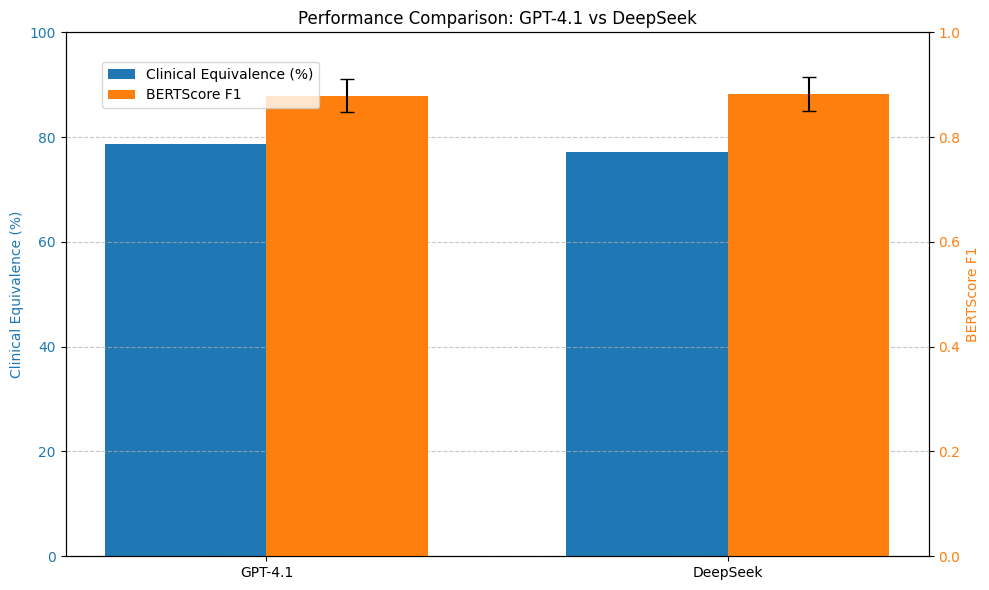

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Labels
labels = ['GPT-4.1', 'DeepSeek']


# Clinical Equivalence Rate (%)
llmjudge_scores = [llmjudge_gpt41, llmjudge_deepseek]

# BERTScore means and stds
bertscore_means = [mean_f1_gpt41, mean_f1_deepseek]
bertscore_stds = [std_f1_gpt41, std_f1_deepseek]

x = np.arange(len(labels))
width = 0.35

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Clinical Equivalence Rate
bar1 = ax1.bar(x - width/2, llmjudge_scores, width, label='Clinical Equivalence (%)', color='tab:blue')
ax1.set_ylabel('Clinical Equivalence (%)', color='tab:blue')
ax1.set_ylim(0, 100)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Second y-axis for BERTScore
ax2 = ax1.twinx()
bar2 = ax2.bar(x + width/2, bertscore_means, width, yerr=bertscore_stds, label='BERTScore F1', color='tab:orange', capsize=5)
ax2.set_ylabel('BERTScore F1', color='tab:orange')
ax2.set_ylim(0, 1)
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Titles and legend
plt.title('Performance Comparison: GPT-4.1 vs DeepSeek')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show grid
ax1.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
